## Popular Data Science Questions

Our goal in this project is to use Data Science Stack Exchange to determine what content should a data science education company create, based on interest by subject.

Stack Exchange
What kind of questions are welcome on this site?
On DSSE's help center's section on questions , we can read that we should:

Avoid subjective questions.
Ask practical questions about Data Science — there are adequate sites for theoretical questions.
Ask specific questions.
Make questions relevant to others.
All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

Open Data (Dataset requests)
Computational Science (Software packages and algorithms in applied mathematics)

In [135]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load the Data

In [136]:
df = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [137]:
# Check the dataframe for null values, datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We see that only FavoriteCount has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after we fill in the missing values on FavoriteCount, there is no reason to store the values as floats.

Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.

In [138]:
df['Tags'].value_counts()

<machine-learning>                                                                 118
<python><pandas>                                                                    58
<python>                                                                            55
<r>                                                                                 38
<tensorflow>                                                                        36
<nlp>                                                                               35
<neural-network>                                                                    35
<reinforcement-learning>                                                            32
<deep-learning>                                                                     29
<keras>                                                                             29
<time-series>                                                                       26
<keras><tensorflow>                        

We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags [source](https://meta.stackexchange.com/a/18879), so one way to deal with this column is to create five columns in questions called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate the columns with the tags in each row.

However, since doesn't help is relating tags from one question to another, we'll just keep them as a list.

## Cleaning the Data

In [139]:
# Fill missing values with zero

df = df.fillna(0)

In [140]:
# Change Data type

df['FavoriteCount'] = df['FavoriteCount'].astype(int)

In [141]:
# Change Object to Datetime

df['CreationDate'] = pd.to_datetime(df['CreationDate'])

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [143]:
# Let's now modify Tags to make it easier to work with.
df['Tags'] = df['Tags'].str.replace('><',',').str.replace('>','').str.replace('<','')

In [144]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0


In [145]:
df.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2861,47862,2019-03-23 21:18:18,0,154,"machine-learning,feature-extraction,tfidf",3,0
4306,61814,2019-10-16 10:50:19,0,40,class-imbalance,2,0
7507,54307,2019-06-22 20:22:13,0,35,"machine-learning,keras,game",0,0


In [146]:
df['TagList'] = df['Tags'].str.split(',')

taglist = df['Tags'].str.split(',')

In [147]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,TagList
0,44419,2019-01-23 09:21:13,1,21,"machine-learning,data-mining",0,0,"[machine-learning, data-mining]"
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0,"[machine-learning, regression, linear-regressi..."
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0,"[python, time-series, forecast, forecasting]"
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0,"[machine-learning, scikit-learn, pca]"
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0,"[dataset, bigdata, data, speech-to-text]"


## Most Used and Most Viewed

We'll begin by counting how many times each tag was used

In [148]:
tag_dict = {}


for i in range(len(taglist)):
    for tag in taglist[i]:
        if tag in tag_dict:
            tag_dict[tag] += 1
        else:
            tag_dict[tag] = 1


In [149]:
tag_dict['machine-learning']

2693

In [150]:
len(tag_dict)

526

In [151]:
for tags in taglist[1]:
    print(tags)

machine-learning
regression
linear-regression
regularization


In [152]:
tag_dict.keys()

dict_keys(['ai', 'grid-search', 'self-study', 'ensemble-modeling', 'image-classification', 'mlp', 'feature-construction', 'coursera', 'multiclass-classification', 'nltk', 'speech-to-text', 'categories', 'machine-translation', 'numpy', 'groupby', 'rstudio', 'etl', 'theory', 'image-preprocessing', 'mini-batch-gradient-descent', 'dplyr', 'domain-adaptation', 'excel', 'dynamic-programming', 'noisification', 'anova', 'softmax', 'discounted-reward', 'impala', 'fuzzy-logic', 'evolutionary-algorithms', 'vae', 'object-detection', 'spearmans-rank-correlation', 'data-augmentation', 'data-mining', 'dqn', 'active-learning', 'software-development', 'hive', 'ipython', 'categorical-encoding', 'lightgbm', 'preprocessing', 'mongodb', 'numerical', 'tableau', 'experiments', 'deepmind', 'data-analysis', 'probability', 'association-rules', 'batch-normalization', 'metric', 'chatbot', 'momentum', 'pgm', 'text-mining', 'lbp', 'keras', 'dbscan', 'parameter', 'manhattan', 'classification', 'community', 'software

In [153]:
# Change dictionary to dataframe
data_items = tag_dict.items()
data_list = list(data_items)

# Create Dataframe
tagdf = pd.DataFrame(data_list, columns = ['Tags','Views'])

In [154]:
tagdf.head()

,Tags,Views
0,ai,25
1,grid-search,35
2,self-study,8
3,ensemble-modeling,30
4,image-classification,211


In [155]:
# Sort Values by Views

tagdf.sort_values('Views', ascending = False)[:20]

,Tags,Views
130,machine-learning,2693
515,python,1814
268,deep-learning,1220
176,neural-network,1055
59,keras,935
63,classification,685
293,tensorflow,584
353,scikit-learn,540
79,nlp,493
265,cnn,489


In [156]:
top10 = tagdf.sort_values('Views', ascending = False)[:10].reset_index()

top10

,index,Tags,Views
0,130,machine-learning,2693
1,515,python,1814
2,268,deep-learning,1220
3,176,neural-network,1055
4,59,keras,935
5,63,classification,685
6,293,tensorflow,584
7,353,scikit-learn,540
8,79,nlp,493
9,265,cnn,489


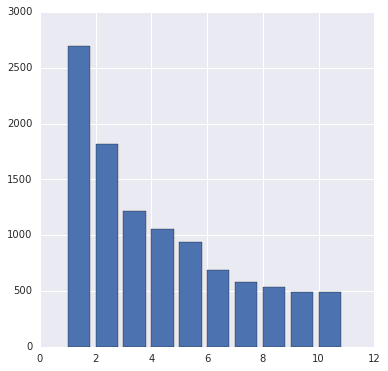

In [157]:
fig = plt.figure(figsize=(6,6))
bar_x_positions = [1,2,3,4,5,6,7,8,9, 10]

bar_heights = top10['Views']

bar_labels = top10['Tags']

plt.bar(bar_x_positions, height = bar_heights)
#plt.xticks(xticks=bar_x_positions,labels=bar_labels)

plt.show()

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



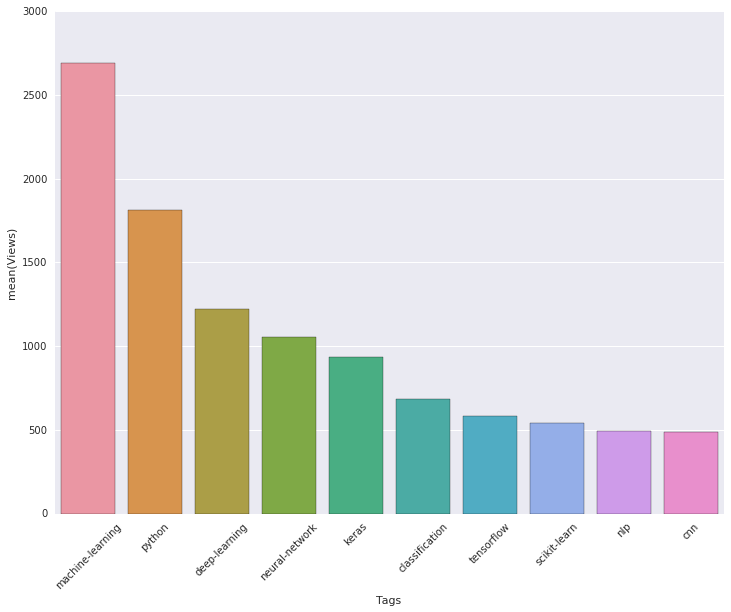

In [158]:
f, ax = plt.subplots(figsize=(12, 9))


sns.barplot(x = 'Tags',
            y = 'Views',
            data = top10)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
# Show the plot
plt.show()

## Additional Analysis (Update)

In [159]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

questions["Tags"].apply(lambda value: type(value)).unique()

questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [160]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
6993,64459,2019-12-09 09:19:08,-1,19,[regression],1,0
1546,57378,2019-08-11 13:47:54,1,48,"[machine-learning, python, scikit-learn, rando...",2,0
8067,65359,2019-12-24 01:25:34,0,20,"[deep-learning, training, prediction]",0,0


In [161]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
ai,25
grid-search,35
self-study,8
ensemble-modeling,30
image-classification,211
mlp,34
feature-construction,16
coursera,3
multiclass-classification,131
nltk,43


In [162]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


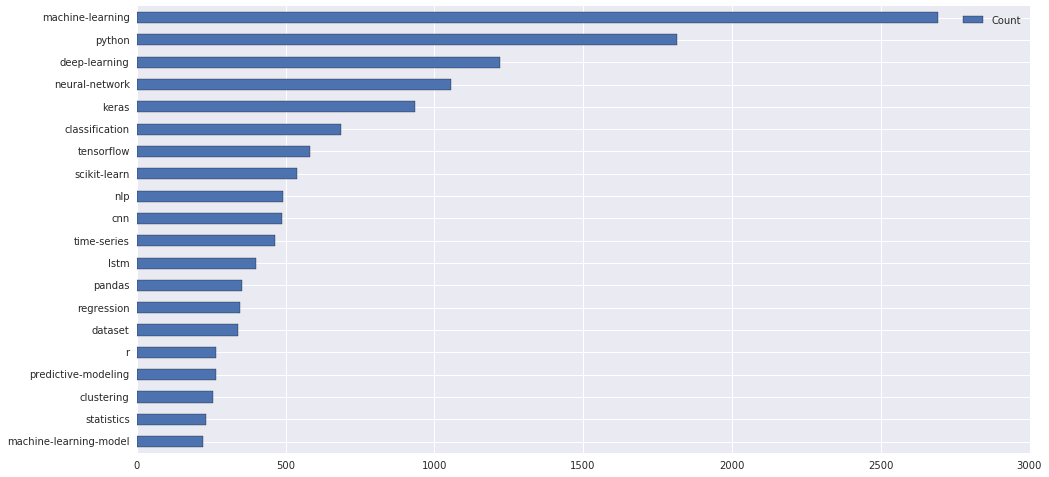

In [163]:
most_used.plot(kind="barh", figsize=(16,8))

Some tags are very, very broad and are unlikely to be useful; e.g.: python, dataset, r. Before we investigate the tags a little deeper, let's repeat the same process for views.

We'll use pandas's pandas.DataFrame.iterrows().

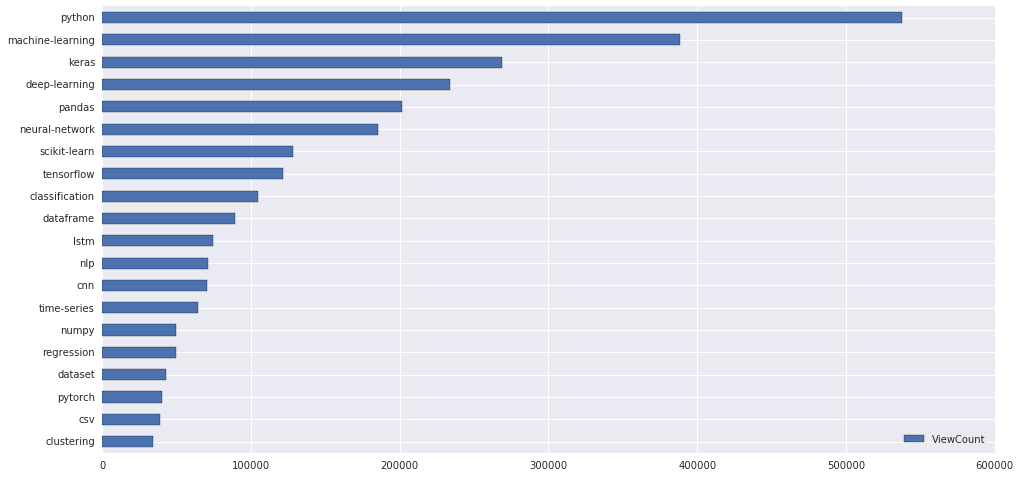

In [164]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99c2ff0438>],
      dtype=object)

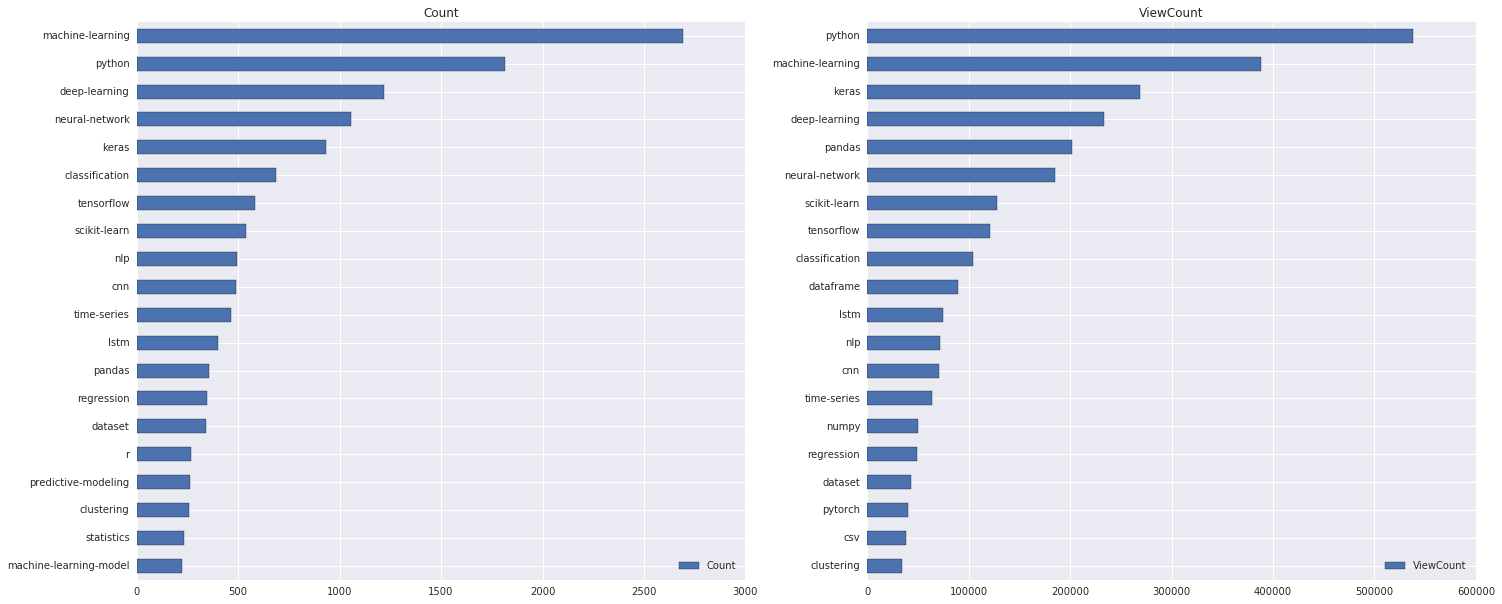

In [165]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [166]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

## Relations Between Tags
One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this.

We'll begin by creating a list of all tags.

In [167]:
all_tags = list(tag_count.index)

In [168]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,ai,grid-search,self-study,ensemble-modeling
ai,NaN,NaN,NaN,NaN
grid-search,NaN,NaN,NaN,NaN
self-study,NaN,NaN,NaN,NaN
ensemble-modeling,NaN,NaN,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in questions["Tags"], we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [169]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

This dataframe is quite large. Let's focus our attention on the most used tags. We'll add some colors to make it easier to talk about the dataframe

In [170]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


The cells highlighted in yellow tell us that time-series was used together with r 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used 2693 times and we confirm it in this dataframe.

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [171]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

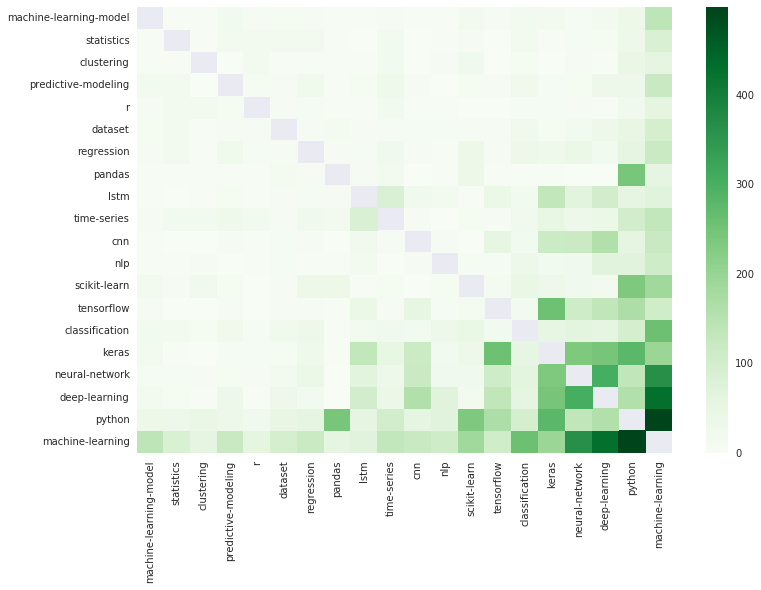

In [172]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk — you'll learn more about statistical independence) in the next step).

We won't get into the details of it, as the technique is out of scope for this course, but it is a path worth investigating!

## Enter Domain Knowledge
Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

## Just a Fad?
Let's read in the file into a dataframe called all_q. We'll parse the dates at read-time.

In [173]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [174]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [175]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
3104,25832,2017-12-20 03:39:45,"[machine-learning, neural-network, deep-learni...",1
1611,646,2014-07-01 17:03:31,[data-indexing-techniques],0
7038,27585,2018-02-08 08:06:06,"[apache-spark, prediction]",0
12580,51904,2019-05-13 18:47:37,"[machine-learning, neural-network, deep-learni...",1
2688,46703,2019-03-05 13:17:23,"[neural-network, keras, recurrent-neural-net]",1


The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [176]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


For the final stretch of this screen, we'll group by quarter and:

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between the two numbers above.

In [177]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
22,19Q4,809,2036,0.397348
17,18Q3,685,1512,0.453042
18,18Q4,531,1294,0.410355
5,15Q3,45,311,0.144695
12,17Q2,226,647,0.349304


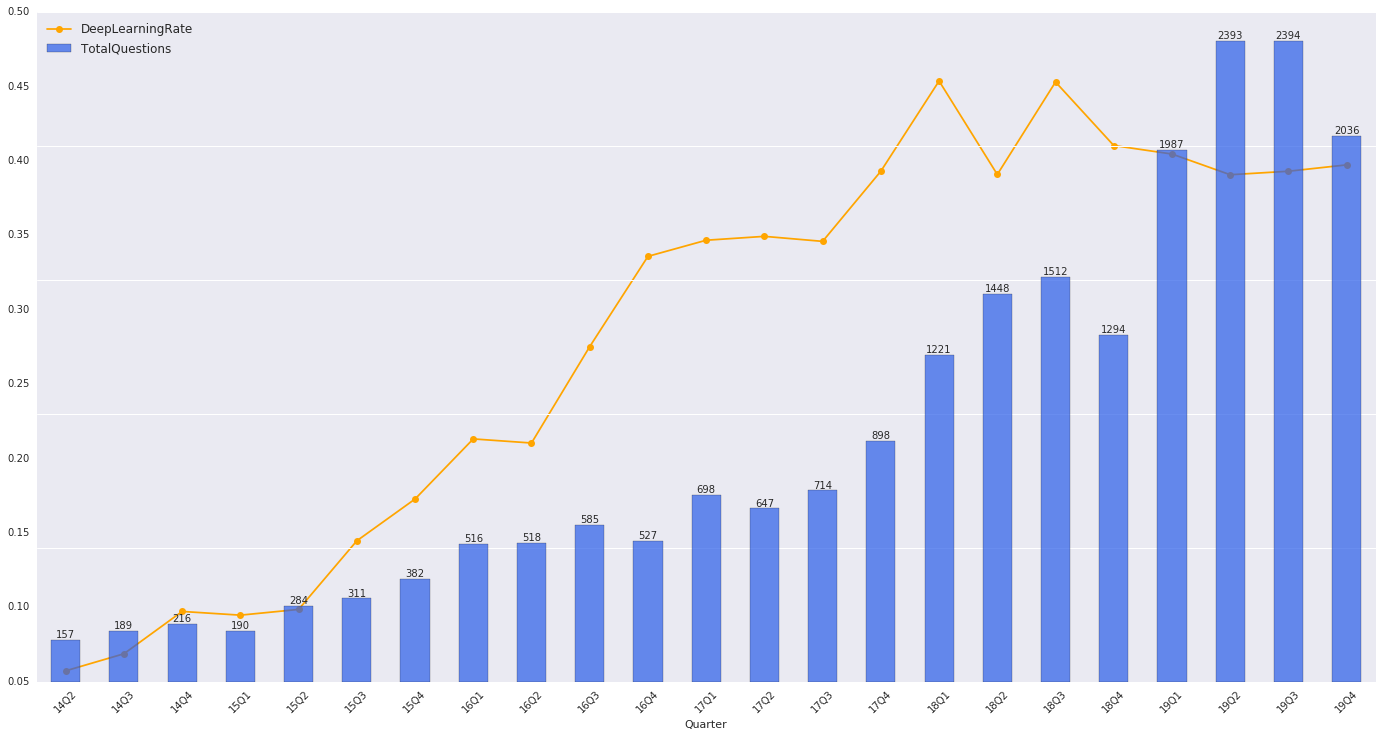

In [178]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45, color='#2A5DE9')

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)


It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.